<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/doc2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
my_path="/content/drive/MyDrive/CS491/Data/US_Inaugural_Addresses"

In [6]:
import os
import string
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [word.translate(table) for word in tokens]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Filter out stop words
    words = [word for word in words if not word in stop_words]
    return words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Iterate over each file in the directory
tagged_data = []

for file in os.listdir(my_path):
    if file.endswith(".txt"):
        file_path = os.path.join(my_path, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
            # Preprocess the file content
            processed_words = preprocess_text(content)
            # Create a TaggedDocument and add to the list
            tagged_data.append(TaggedDocument(words=processed_words, tags=[file.replace('.txt', '')]))

print(f'length of tagged data={len(tagged_data)}')

length of tagged data=59


In [145]:
# Train a Doc2Vec model
model = Doc2Vec(vector_size=100, window=8, min_count=1, workers=2, epochs=40, dm=1)
#dm=1 is DM meaning distributed memory. Think prob(w |c,D)
#dm=0 is DMBOW. Think prob(w|D)

model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


In [146]:
# Assuming `model` is your trained Doc2Vec model
num_vectors = len(model.dv)
print(f"Number of vectors in the model: {num_vectors}")

# Number of word vectors in the model
num_word_vectors = len(model.wv)
print(f"Number of word vectors in the model: {num_word_vectors}")

# Combined total of document and word vectors
total_vectors = len(model.dv) + len(model.wv)
print(f"Total number of document and word vectors in the model: {total_vectors}")


Number of vectors in the model: 59
Number of word vectors in the model: 9235
Total number of document and word vectors in the model: 9294


In [147]:
# Extract document IDs from tagged_data
document_ids = [doc.tags[0] for doc in tagged_data]

In [148]:
##This code cell is fancy stuff to print the doc ids in three columns

from itertools import zip_longest

# Assume document_ids is already defined and contains your document IDs
document_ids_sorted = sorted(document_ids)

# Function to divide the document IDs into three columns
def divide_into_columns(lst, n):
    """Divide a list into n columns."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# Calculate the length of each column
n = len(document_ids_sorted)
column_length = -(-n // 3)  # Ceiling division to ensure all items are included

# Use zip_longest to iterate over the document IDs in three columns
for column in zip_longest(*divide_into_columns(document_ids_sorted, column_length), fillvalue=''):
    print('{:<30}{:<30}{:<}'.format(*column))


01_washington_1789            21_grant_1869                 41_truman_1949
02_washington_1793            22_grant_1873                 42_eisenhower_1953
03_adams_john_1797            23_hayes_1877                 43_eisenhower_1957
04_jefferson_1801             24_garfield_1881              44_kennedy_1961
05_jefferson_1805             25_cleveland_1885             45_johnson_1965
06_madison_1809               26_harrison_1889              46_nixon_1969
07_madison_1813               27_cleveland_1893             47_nixon_1973
08_monroe_1817                28_mckinley_1897              48_carter_1977
09_monroe_1821                29_mckinley_1901              49_reagan_1981
10_adams_john_quincy_1825     30_roosevelt_theodore_1905    50_reagan_1985
11_jackson_1829               31_taft_1909                  51_bush_george_h_w_1989
12_jackson_1833               32_wilson_1913                52_clinton_1993
13_van_buren_1837             33_wilson_1917                53_clinton_1997
14_har

In [149]:
# Assume `model` is your trained Doc2Vec model and `document_id` is the ID of the document of interest
document_id = '21_grant_1869'  # Replace this with the actual document ID
similar_docs = model.dv.most_similar(document_id,topn=10)
for tag, similarity in similar_docs:
    print(f"Document ID: {tag}, Similarity: {similarity}")


Document ID: 16_taylor_1849, Similarity: 0.7417188882827759
Document ID: 22_grant_1873, Similarity: 0.730068027973175
Document ID: 25_cleveland_1885, Similarity: 0.724763035774231
Document ID: 11_jackson_1829, Similarity: 0.723727822303772
Document ID: 02_washington_1793, Similarity: 0.7156985402107239
Document ID: 23_hayes_1877, Similarity: 0.7096316814422607
Document ID: 01_washington_1789, Similarity: 0.647455632686615
Document ID: 28_mckinley_1897, Similarity: 0.6192625164985657
Document ID: 27_cleveland_1893, Similarity: 0.6000412702560425
Document ID: 20_lincoln_1865, Similarity: 0.5950994491577148


In [150]:
word = 'war'  # Replace this with your word of interest
word_vector = model.wv[word]  # Get the vector for the word

# Find documents most similar to the word vector
similar_docs = model.dv.most_similar([word_vector], topn=10)  # Adjust topn as needed

for tag, similarity in similar_docs:
    print(f"Document ID: {tag}, Similarity: {similarity}")


Document ID: 07_madison_1813, Similarity: 0.6217494606971741
Document ID: 09_monroe_1821, Similarity: 0.5899432301521301
Document ID: 20_lincoln_1865, Similarity: 0.5307376980781555
Document ID: 08_monroe_1817, Similarity: 0.4457174837589264
Document ID: 18_buchanan_1857, Similarity: 0.40437543392181396
Document ID: 22_grant_1873, Similarity: 0.3830622434616089
Document ID: 44_kennedy_1961, Similarity: 0.3484325408935547
Document ID: 47_nixon_1973, Similarity: 0.3409196138381958
Document ID: 40_roosevelt_franklin_1945, Similarity: 0.3399730920791626
Document ID: 12_jackson_1833, Similarity: 0.33259788155555725


In [151]:
document_id = '19_lincoln_1861'  # Replace this with the actual document ID
document_vector = model.dv[document_id]  # Get the document vector

# Find words most similar to the document vector
# Note: This functionality is not directly supported by Gensim's Doc2Vec,
# but we can approximate by using the similarity function in the word vectors space.
similar_words = model.wv.similar_by_vector(document_vector, topn=10)  # Adjust topn as needed

for word, similarity in similar_words:
    print(f"Word: {word}, Similarity: {similarity}")


Word: minority, Similarity: 0.839627742767334
Word: secede, Similarity: 0.810380220413208
Word: clause, Similarity: 0.808196485042572
Word: dissatisfied, Similarity: 0.8018434047698975
Word: case, Similarity: 0.7639660835266113
Word: contemplation, Similarity: 0.7628025412559509
Word: refuses, Similarity: 0.7571296691894531
Word: repelled, Similarity: 0.7563183307647705
Word: proposition, Similarity: 0.7409641742706299
Word: consequence, Similarity: 0.7328685522079468


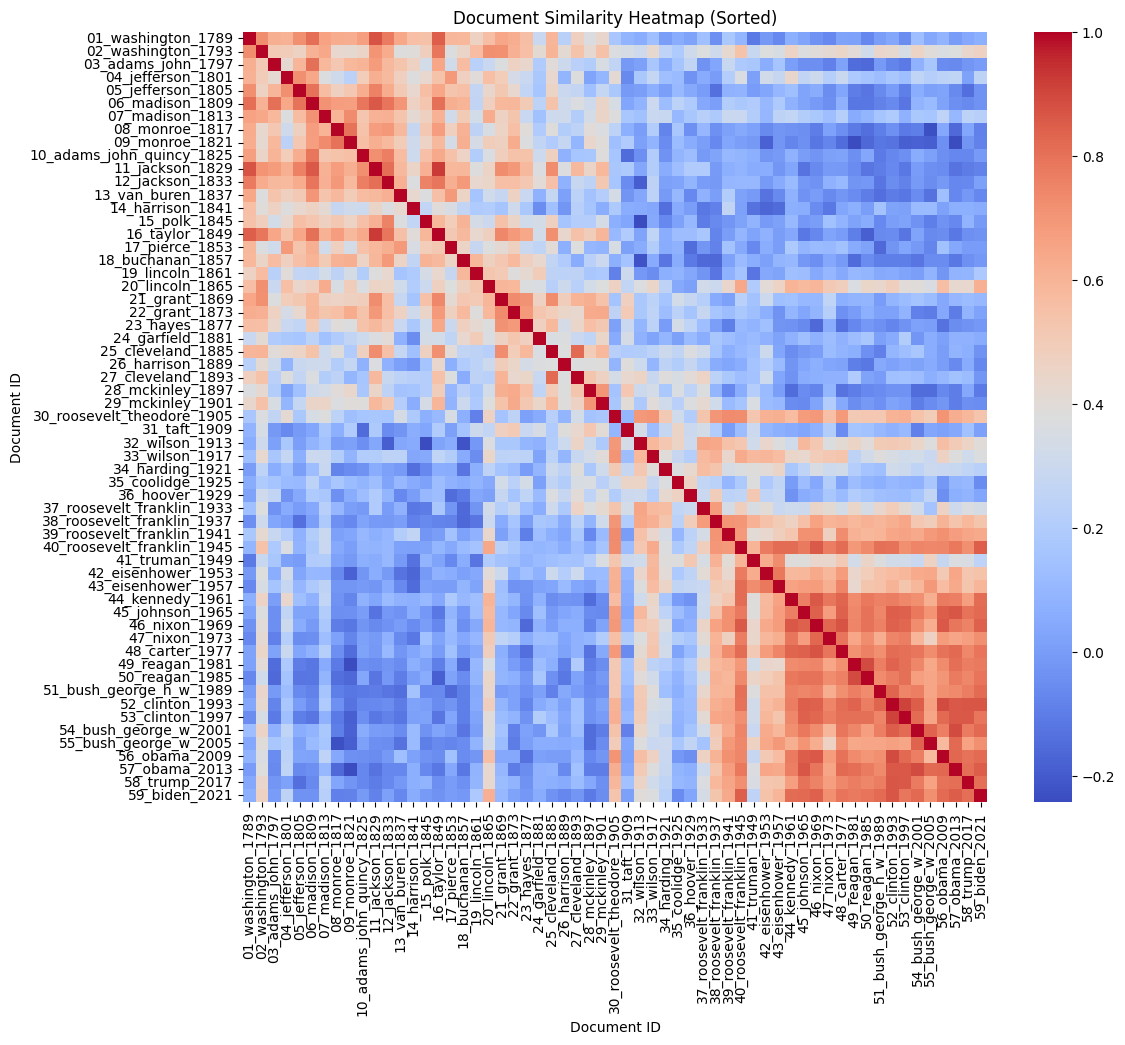

In [152]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Sort the document IDs
document_ids_sorted = sorted(document_ids)

# Initialize a sorted similarity matrix
sorted_similarity_matrix = np.zeros((len(document_ids_sorted), len(document_ids_sorted)))

# Populate the sorted similarity matrix
for i, doc_id_1 in enumerate(document_ids_sorted):
    for j, doc_id_2 in enumerate(document_ids_sorted):
        # No need to check if i <= j due to recalculating for sorted IDs
        similarity = model.dv.similarity(doc_id_1, doc_id_2)
        sorted_similarity_matrix[i, j] = similarity

# Visualize the sorted similarity matrix as a heatmap
plt.figure(figsize=(12, 10))
# Using the sorted document IDs for both axes
sns.heatmap(sorted_similarity_matrix, annot=False, cmap='coolwarm', xticklabels=document_ids_sorted, yticklabels=document_ids_sorted)
plt.title('Document Similarity Heatmap (Sorted)')
plt.xlabel('Document ID')
plt.ylabel('Document ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)
plt.show()


In [96]:
##Find documents most similar to a linear combination of words
# Assuming `model` is your trained Doc2Vec model

# List of words in your query and their respective weights (if applicable)
words = ['democracy', 'freedom', 'women']
weights = [1, 1, 1]  # coefficients of linear combination

# Obtain word vectors and compute the weighted average
word_vectors = [model.wv[word] for word in words if word in model.wv]
linear_comb = sum(weight * word_vector for word_vector, weight in zip(word_vectors, weights))

# Find documents similar to this composite vector
similar_documents = model.dv.most_similar([linear_comb], topn=5)

for doc_id, similarity in similar_documents:
    print(f"Document ID: {doc_id}, Similarity: {similarity}")


Document ID: 40_roosevelt_franklin_1945, Similarity: 0.4858354330062866
Document ID: 39_roosevelt_franklin_1941, Similarity: 0.4421727955341339
Document ID: 30_roosevelt_theodore_1905, Similarity: 0.3702729642391205
Document ID: 58_trump_2017, Similarity: 0.35004955530166626
Document ID: 59_biden_2021, Similarity: 0.3343011140823364
